# Week 2 Assignment: Optimisation and Root Finding 
## Pat Xua Tan 21018836
In the following sections, we will be using two methods for finding root of the energy function of the quantum harmonic oscillator. We will use the bisection method for 1D array function and conjugate gradients for 2D array function.

In [113]:
import numpy as np
import matplotlib.pyplot as plt


### Section on 1D QHO


In [44]:
def bisection(fun,a,b,tol):
    """creating a bisection function for finding root of a given input function
    
    inputs:
    fun - function 
    a - first bracket point 
    b - second bracket point
    tol - tolerance/ accuracy of calculation of the root
    
    """
    # Evaluate f(a) and f(b)
    f_a = fun(a)
    f_b = fun(b)
    #counter i
    i=0
    
    f_c = fun((a+b)/2)  #intial evaluation of the midpoint value in the function for tolerance comparison in loop
    
    # Now an iterative loop
    while abs(f_c)>tol:
        
        c=(a+b)/2     # defining a new variable to store the renewed value of midpoint after each loop
        
        i+=1
        f_c= fun(c)
        if f_c * f_a>0: # a condition to check if the midpoint c and the initial point a have the same sign or not
            a=c
            f_a = f_c
        else:
            b=c
            f_b=f_c
    return i,c    # returning the counter value and the midpoint which is our root for the input function 
    


In [45]:
def QHO_E(alpha):
    """defining the energy function in terms of alpha"""
    E= alpha/2 + 1/(8*alpha)
    return E


6.010416666666667

In [46]:
def QHO_grad(alpha):
    """defining the derivative of the energy function with respect to alpha"""
    dE_dA = 1/2 - 1/(8*alpha**2)
    return dE_dA

(-1.0, 1.0)

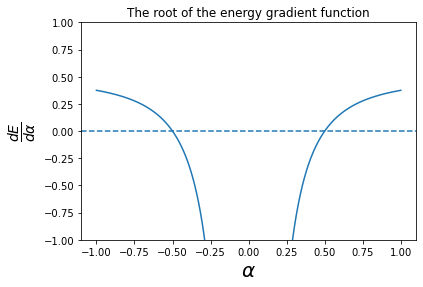

In [47]:
'''Plot the graph of E to determine a suitable brackets '''

x = np.linspace(-1,1,1000)
plt.plot(x,QHO_grad(x))
plt.axhline(ls='dashed') # adding a horizontal dashed line y=0 to locate the roots
plt.title('The root of the energy gradient function')
plt.ylabel(r'$\frac{dE} {d\alpha} $', fontsize=20)
plt.xlabel(r'$\alpha$',fontsize = 20)
plt.ylim(-1,1) # limit the range of y to have a clear view of the location of the roots

In [59]:
# Define brackets and tolerance
n, alpha = bisection(QHO_grad, -0.7,-0.2,1e-6 ) # Suitable arguments
# Output result
print('After' ,n,'iteration, the root of the gradient energy function (alpha) is', alpha)
print('By the calculation of alpha from bisection, the minimum energy is ', QHO_E(alpha),'J')

After 19 iteration, the root of the gradient energy function (alpha) is -0.5000001907348632
By the calculation of alpha from bisection, the minimum energy is  -0.5000000000000364 J


### Conclusion on Section 1

Due to a finite precision of computation, our alpha value is probably -0.5 with a minimum energy of E=-0.5J .

### Section on 2D QHO


In [65]:
def QHO_2D_grad(x):
    """Defining the Gradient of the energy function (2D array)
    
    input:
    x - 2D array where x[0] is alpha and x[1] is beta
    
    """
    #partial alpha and partial beta of the energy function 
    dE_da = 1/2 - 1/(8*x[0]**2)
    dE_db = 1/2 - 1/(8*x[1]**2)
    
    return np.array([dE_da,dE_db ])

In [67]:
def QHO_2D_E(x):
    """The energy function (1D array) in terms of alpha and beta
    
    input:
    x - 2D array where x[0] is alpha and x[1] is beta
    
    """
    a = x[0]
    b = x[1]
    
    E2D = a/2 +1/(8*a) + b/2 + 1/(8*b)
      
    return E2D 

Text(0, 0.5, 'beta')

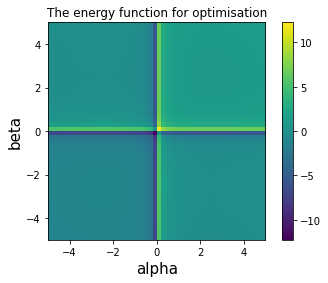

In [124]:
'Plotting the energy function graph in terms of alpha and beta'
alpha = np.linspace(-1,1)
beta = np.linspace(-1,1)

aa,bb = np.meshgrid(alpha,beta)
plt.imshow(QHO_2D_E([aa,bb]),extent=(-5,5,-5,5),origin='lower')
plt.colorbar()
plt.title('The energy function for optimisation')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('beta',fontsize=15)

Text(0, 0.5, 'beta')

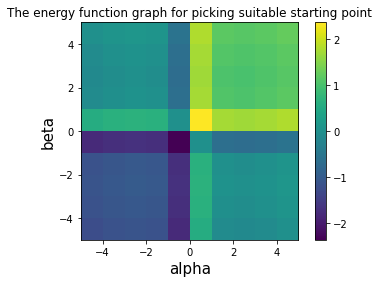

In [127]:
'another energy function with less amount of point data for bracketing the root'
alpha = np.linspace(-1,1,10)
beta = np.linspace(-1,1,10)

aa,bb = np.meshgrid(alpha,beta)
plt.imshow(QHO_2D_E([aa,bb]),extent=(-5,5,-5,5),origin='lower')
plt.colorbar()
plt.title('The energy function graph for picking suitable starting point')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('beta',fontsize=15)

#### Description of the graph plotted above####
The graph for the energy function look reasonable as it resemble the look of an asymptotic curve in both beta and alpha variable in which both alpha and beta functions tends to positive infinite as both variables (alpha and beta) tends to zero from the positive side and negative infinite as both varaibles tends to zero from the negative side. As we can already see from the lower resolution graph, the root is located around square box bounded by the four points (0,0),(1,0),(0,-1),(-1,-1) and another square box by the four points (0,0),(-1,0),(0,1),(-1,1) so we expect our root to be located around those area and this will help us later to pick a much better starting point for optimisation.

In [101]:
from scipy import optimize
x0 = np.array([1,1]) # Pick a starting point with the help of the plotted energy function graph
opt_result = optimize.minimize(QHO_2D_E , x0, method='CG', jac= QHO_2D_grad) 

In [112]:
# Print resulting minimum, number of iterations using opt_result.x etc
print(opt_result.success)
print("Minimum is at: alpha is ",opt_result.x[0], ' and beta is ', opt_result.x[1] )
print("Iters: ",opt_result.nit)

# Confirm whether the optimisation was successful

'''opt_result.success gives a return boolean True therefore the optimisation was successful and only require 

3 interation for the optimisation process.
'''


True
Minimum is at: alpha is  0.500000689964622  and beta is  0.500000689964622
Iters:  3


'opt_result.success gives a return boolean True therefore the optimisation was successful and only require \n\n3 interation for the optimisation process.\n'

### Conclusions
I have learned that althought the optimisation function from Scipy is useful, it has a downside of going terribly wrong and require huge amount of iteration if the initial point is too far away from the root.